In [1]:
import pandas as pd
import astropy
from astropy import units as u
from astropy.coordinates import Angle
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris, EarthLocation, GeocentricTrueEcliptic
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import numpy as np

In [2]:
t = Time('2024-04-13T21:08:00')
m1_2024 = pd.read_csv('./Stellarium_ephemeris/2024_m1_yv.csv')

m1_2024_coords = [SkyCoord(ra=Angle(m1_2024[' RA (J2000)'][i]), dec=Angle(m1_2024[' Dec (J2000)'][i]), frame='icrs') for i in range(len(m1_2024[' RA (J2000)']))]
m1_2024_longs = [m1_2024_coords[i].transform_to(GeocentricTrueEcliptic(equinox=t+i*8)).lon.degree for i in range(5)]

print(m1_2024_longs)
for i in range(4):
    print(Angle(m1_2024_longs[i+1]-m1_2024_longs[i]-8, unit='deg'))

[24.197027968632597, 32.01838627611058, 39.80465688793194, 47.5628637968087, 55.29310222739871]
-0d10m43.11009308s
-0d12m49.42579744s
-0d14m30.45512804s
-0d16m11.14164988s


In [3]:
t = Time('2023-04-14T15:05:00')
m1_2023 = pd.read_csv('./Stellarium_ephemeris/2023_m1_yv.csv')

m1_2023_coords = [SkyCoord(ra=Angle(m1_2023[' RA (J2000)'][i]), dec=Angle(m1_2023[' Dec (J2000)'][i]), frame='icrs') for i in range(len(m1_2023[' RA (J2000)']))]
m1_2023_longs = [m1_2023_coords[i].transform_to(GeocentricTrueEcliptic(equinox=t+i*8)).lon.degree for i in range(5)]

print(m1_2023_longs)
for i in range(4):
    print(Angle(m1_2023_longs[i+1]-m1_2023_longs[i]-8, unit='deg'))

[24.18355940127157, 32.00889828942588, 39.79901681574577, 47.55396443489191, 55.28191090704264]
-0d10m28.78000264s
-0d12m35.57330525s
-0d14m42.18857107s
-0d16m19.39270026s


In [4]:
import sys
import os
sys.path.append(os.path.abspath("d:\Library\Astronomy\VākyaPañcāṅga\SPA_c_implementation"))
import siddhanta_model

In [5]:
def ayanamsha (jd):
    d = jd - 2415020.0 # AD1900 Jan 1
    p = 50.2564 + 0.000222*d/365.25
    return 22+27/60+37/3600-10/216000 + (p/3600)*(d/365.25)

siddhanta_model.to_dms(ayanamsha(Time('2100-11-20T00:00:00').jd))

C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


[25.0, 16.0, 1.0, 26.0, 46.0]

In [6]:
import numpy as np
from numpy import sin, arcsin, cos, arccos, arctan2, pi

def eq2ec(alpha, delta, epsilon):
    beta = arcsin(delta)*cos(epsilon) - cos(delta)*sin(epsilon)*sin(alpha)
    coslambda = cos(alpha)*cos(delta)/cos(beta)
    sinlambda = (sin(delta)*sin(epsilon)+cos(delta)*cos(epsilon)*sin(alpha))/cos(beta)
    long = arctan2(sinlambda, coslambda)
    if long < 0:
        long = long + 2*pi
    return [Angle(long, unit='rad'), Angle(beta, unit='rad')]
# print([eq2ec(x.icrs.ra.rad, x.icrs.dec.rad, ) for x in ephem2029_coords])

[dms_tuple(d=0.0, m=0.0, s=1.4999999999999998), dms_tuple(d=0.0, m=54.0, s=41.99999999999932), dms_tuple(d=1.0, m=49.0, s=20.999999999999233), dms_tuple(d=2.0, m=43.0, s=58.49999999999838), dms_tuple(d=3.0, m=38.0, s=34.49999999999889), dms_tuple(d=4.0, m=33.0, s=10.499999999999403), dms_tuple(d=5.0, m=27.0, s=44.999999999994884), dms_tuple(d=6.0, m=22.0, s=19.49999999999676), dms_tuple(d=7.0, m=16.0, s=53.999999999998636), dms_tuple(d=8.0, m=11.0, s=29.999999999999147), dms_tuple(d=9.0, m=6.0, s=5.999999999993264), dms_tuple(d=10.0, m=0.0, s=43.49999999999241), dms_tuple(d=10.0, m=55.0, s=20.99999999999156), dms_tuple(d=11.0, m=50.0, s=2.9999999999930083), dms_tuple(d=12.0, m=44.0, s=44.99999999999446), dms_tuple(d=13.0, m=39.0, s=29.99999999999318), dms_tuple(d=14.0, m=34.0, s=19.499999999994202), dms_tuple(d=15.0, m=29.0, s=10.499999999987466), dms_tuple(d=16.0, m=24.0, s=5.999999999989427), dms_tuple(d=17.0, m=19.0, s=4.499999999982265), dms_tuple(d=18.0, m=14.0, s=5.99999999999795

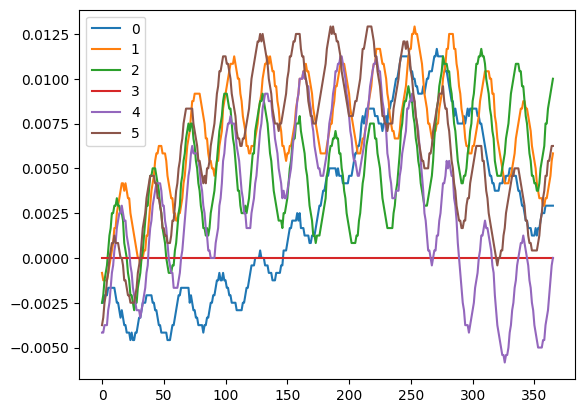

In [7]:
files = ['./Stellarium_ephemeris/ephem20%d.csv'%x for x in range(29,35)]
obliquities = [Angle('23d26m09.4s'), Angle('23d26m06.5s'), Angle('23d26m03.0s'), Angle('23d26m00.0s'), Angle('23d25m57.8s'), Angle('23d25m56.8s')]

j2000_ayanamsha = Angle('23d51m39.5s')

longs =[]
for i in range(len(files)):
    ephem = pd.read_csv(files[i])
    obliquity = obliquities[i]
    ephem_coords = [SkyCoord(ra=Angle(ephem[' RA (J2000)'][i]), dec=Angle(ephem[' Dec (J2000)'][i]), frame='icrs') for i in range(len(ephem[' RA (J2000)']))]
    ephem_ecliptic = [eq2ec(x.icrs.ra.rad, x.icrs.dec.rad, obliquity.rad) for x in ephem_coords]
    # print([e[0].dms for e in ephem_ecliptic])
    longs.append([e.icrs.ra for e in ephem_coords])
    print([l.dms for l in longs[i]])

def limit(x):
    if x>1:
        x = x-360
    return x

for j in range(len(files)):
    plt.plot([limit(longs[j][i].degree-longs[3][i].degree) for i in range(len(longs[0])-1)], label = '%d'%j)

plt.legend()
plt.show()

In [8]:
jd2029 = 2462216.250451
jd2030 = 2462581.504699
jd2031 = 2462946.762743

print(jd2031-jd2030)
print(jd2030-jd2029)

365.2580439997837
365.25424800021574


In [9]:
def nirayana_long(j2000_l):
    return Angle(j2000_l - j2000_ayanamsha.degree, unit = 'degree')

def j2000_long(nirayana_l):
    return Angle(nirayana_l + j2000_ayanamsha.degree, unit='degree')

for i in range(12):
    print(j2000_long(i*30))

23d51m39.5s
53d51m39.5s
83d51m39.5s
113d51m39.5s
143d51m39.5s
173d51m39.5s
203d51m39.5s
233d51m39.5s
263d51m39.5s
293d51m39.5s
323d51m39.5s
353d51m39.5s


In [10]:
import csv

obliquity = Angle('23d26m09.4s')

longs = []
for x in range(1,13):
    ephem = pd.read_csv('.\Stellarium_ephemeris\R%d_2029.csv'%x)
    ephem_coords = [SkyCoord(ra=Angle(ephem[' RA (J2000)'][i]), dec=Angle(ephem[' Dec (J2000)'][i]), frame='icrs') for i in range(len(ephem[' RA (J2000)']))]
    ephem_ecliptic = [eq2ec(x.icrs.ra.rad, x.icrs.dec.rad, obliquity.rad) for x in ephem_coords]

    with open('.\Stellarium_ephemeris\Longitudes\R%d_2029_longs.csv'%x, 'w', newline="") as longitudes_csv:
        csv.writer(longitudes_csv).writerow(['Date and Time', 'Nirayana Longitude(Degrees)', 'Latitude'])
        data = [[ephem[' Date and Time'][i], ephem_ecliptic[i][0].degree-j2000_ayanamsha.degree, ephem_ecliptic[i][1].degree] for i in range(len(ephem_ecliptic))]
        csv.writer(longitudes_csv).writerows(data)
    # print(Angle(ephem_ecliptic[i][0].degree-j2000_ayanamsha.degree, unit='degree').dms)
    print(ephem_ecliptic[0][0].degree)
    if x != 1:
        for i in range(4):
            print(Angle(ephem_ecliptic[8*i+9][0].degree-ephem_ecliptic[8*i+1][0].degree-8, unit='deg').dms)


23.860832722175086
53.86064354514111
dms_tuple(d=-0.0, m=-17.0, s=-54.754136492666134)
dms_tuple(d=-0.0, m=-19.0, s=-28.78977690517729)
dms_tuple(d=-0.0, m=-20.0, s=-24.534752835995732)
dms_tuple(d=-0.0, m=-21.0, s=-9.659482374805748)
83.8612723755567
dms_tuple(d=-0.0, m=-21.0, s=-55.03114790667723)
dms_tuple(d=-0.0, m=-22.0, s=-25.195822487386295)
dms_tuple(d=-0.0, m=-22.0, s=-18.939877793166033)
dms_tuple(d=-0.0, m=-22.0, s=-3.1990304332725827)
113.86110246263074
dms_tuple(d=-0.0, m=-21.0, s=-54.342175124107825)
dms_tuple(d=-0.0, m=-21.0, s=-11.822091316983006)
dms_tuple(d=-0.0, m=-20.0, s=-1.9574722152015056)
dms_tuple(d=-0.0, m=-18.0, s=-52.233517359111374)
143.86091087086618
dms_tuple(d=-0.0, m=-17.0, s=-48.6575420754707)
dms_tuple(d=-0.0, m=-16.0, s=-7.242318537466872)
dms_tuple(d=-0.0, m=-14.0, s=-7.438536133040543)
dms_tuple(d=-0.0, m=-12.0, s=-19.68131447405767)
173.86059931889486
dms_tuple(d=-0.0, m=-10.0, s=-43.74019624727907)
dms_tuple(d=-0.0, m=-8.0, s=-27.42778017533965)


In [17]:
# obliquity = Angle('23d26m09.4s')
obliquity = Angle('23d29m31.6s')


longs = []
for x in range(1,13):
    ephem = pd.read_csv('.\Stellarium_ephemeris\R%d_1600.csv'%x)
    ephem_coords = [SkyCoord(ra=Angle(ephem[' RA (J2000)'][i]), dec=Angle(ephem[' Dec (J2000)'][i]), frame='icrs') for i in range(len(ephem[' RA (J2000)']))]
    ephem_ecliptic = [eq2ec(x.icrs.ra.rad, x.icrs.dec.rad, obliquity.rad) for x in ephem_coords]

    with open('.\Stellarium_ephemeris\Longitudes\R%d_1600_longs.csv'%x, 'w', newline="") as longitudes_csv:
        csv.writer(longitudes_csv).writerow(['Date and Time', 'Nirayana Longitude(Degrees)', 'Latitude'])
        data = [[ephem[' Date and Time'][i], ephem_ecliptic[i][0].degree-j2000_ayanamsha.degree, ephem_ecliptic[i][1].degree] for i in range(len(ephem_ecliptic))]
        csv.writer(longitudes_csv).writerows(data)
    # print(Angle(ephem_ecliptic[i][0].degree-j2000_ayanamsha.degree, unit='degree').dms)
    print(ephem_ecliptic[0][0].degree)
    for i in range(4):
        print(Angle(ephem_ecliptic[8*i+9][0].degree-ephem_ecliptic[8*i+1][0].degree-8, unit='deg').dms)

23.861100258974727
dms_tuple(d=-0.0, m=-11.0, s=-12.426340866651628)
dms_tuple(d=-0.0, m=-13.0, s=-23.294282605395438)
dms_tuple(d=-0.0, m=-15.0, s=-25.486991274385673)
dms_tuple(d=-0.0, m=-16.0, s=-56.91079735510925)
53.86186215140005
dms_tuple(d=-0.0, m=-18.0, s=-8.576117040145164)
dms_tuple(d=-0.0, m=-19.0, s=-40.923311522334984)
dms_tuple(d=-0.0, m=-20.0, s=-52.112288352520864)
dms_tuple(d=-0.0, m=-21.0, s=-30.156696356552857)
83.86121495945658
dms_tuple(d=-0.0, m=-21.0, s=-59.85531280368491)
dms_tuple(d=-0.0, m=-22.0, s=-33.55632921936149)
dms_tuple(d=-0.0, m=-22.0, s=-35.97502009658797)
dms_tuple(d=-0.0, m=-22.0, s=-9.74335137312778)


FileNotFoundError: [Errno 2] No such file or directory: '.\\Stellarium_ephemeris\\R4_1600.csv'